In [86]:
import csv
import glob
import keras
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras.models import Sequential
from keras.layers import Convolution2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.datasets import mnist
from keras.optimizers import RMSprop
from keras.callbacks import TensorBoard
from matplotlib import image
from numpy import asarray
from os import listdir
from scipy import stats
from sklearn.preprocessing import StandardScaler
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)}) #standardize sizing for seaborn plots

In [29]:
df = pd.read_csv('pokemon.csv')
df.head()

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN


In [31]:
df.count()

Name     809
Type1    809
Type2    405
dtype: int64

In [32]:
df.describe()

,Name,Type1,Type2
count,809,809,405
unique,809,18,18
top,dragonair,Water,Flying
freq,1,114,95


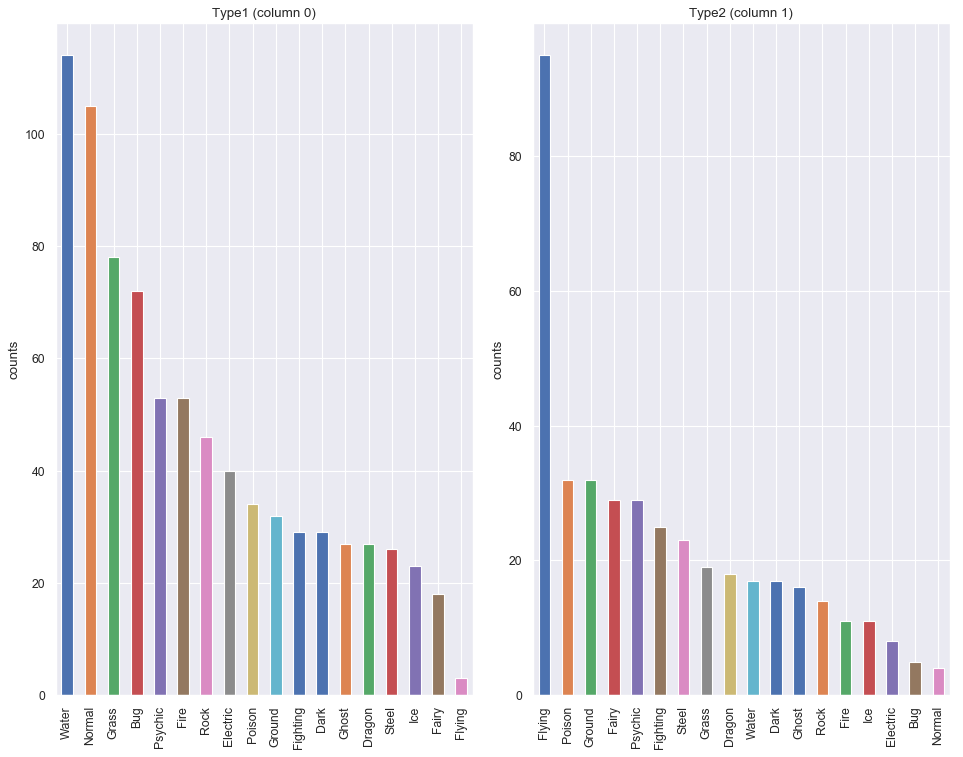

In [27]:
plotPerColumnDistribution(df, 10, 5)

In [87]:
pokemon_data = list()
for filename in listdir('images'):
    img_data = image.imread('images/' + filename)
    pokemon_data.append(img_data)
    print('> loaded %s %s' % (filename, img_data.shape))
    
# https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/

> loaded parasect.png (120, 120, 4)
> loaded lumineon.png (120, 120, 4)
> loaded raikou.png (120, 120, 4)
> loaded comfey.jpg (120, 120, 3)
> loaded dedenne.png (120, 120, 4)
> loaded pyroar.png (120, 120, 4)
> loaded articuno.png (120, 120, 4)
> loaded magmortar.png (120, 120, 4)
> loaded bulbasaur.png (120, 120, 4)
> loaded banette.png (120, 120, 4)
> loaded staraptor.png (120, 120, 4)
> loaded pidove.png (120, 120, 4)
> loaded comfey.png (120, 120, 3)
> loaded taillow.png (120, 120, 4)
> loaded charizard.png (120, 120, 4)
> loaded infernape.png (120, 120, 4)
> loaded sandshrew.png (120, 120, 4)
> loaded marshadow.png (120, 120, 3)
> loaded alakazam.png (120, 120, 4)
> loaded lickitung.png (120, 120, 4)
> loaded starmie.png (120, 120, 4)
> loaded yanmega.png (120, 120, 4)
> loaded yveltal.png (120, 120, 4)
> loaded zigzagoon.png (120, 120, 4)
> loaded thundurus-incarnate.png (120, 120, 4)
> loaded petilil.png (120, 120, 4)
> loaded torterra.png (120, 120, 4)
> loaded purugly.png (120

> loaded bewear.png (120, 120, 3)
> loaded houndour.png (120, 120, 4)
> loaded eelektrik.png (120, 120, 4)
> loaded quilava.png (120, 120, 4)
> loaded whimsicott.png (120, 120, 4)
> loaded magikarp.png (120, 120, 4)
> loaded bewear.jpg (120, 120, 3)
> loaded drowzee.png (120, 120, 4)
> loaded stakataka.jpg (120, 120, 3)
> loaded claydol.png (120, 120, 4)
> loaded clamperl.png (120, 120, 4)
> loaded seedot.png (120, 120, 4)
> loaded garchomp.png (120, 120, 4)
> loaded skiddo.png (120, 120, 4)
> loaded hypno.png (120, 120, 4)
> loaded weedle.png (120, 120, 4)
> loaded stakataka.png (120, 120, 3)
> loaded ambipom.png (120, 120, 4)
> loaded spoink.png (120, 120, 4)
> loaded pikipek.png (120, 120, 3)
> loaded frillish.png (120, 120, 4)
> loaded primarina.jpg (120, 120, 3)
> loaded cutiefly.png (120, 120, 3)
> loaded honchkrow.png (120, 120, 4)
> loaded tympole.png (120, 120, 4)
> loaded meganium.png (120, 120, 4)
> loaded incineroar.png (120, 120, 3)
> loaded lileep.png (120, 120, 4)
> load

> loaded cradily.png (120, 120, 4)
> loaded mudkip.png (120, 120, 4)
> loaded lunala.png (120, 120, 3)
> loaded celesteela.jpg (120, 120, 3)
> loaded mudsdale.png (120, 120, 3)
> loaded bounsweet.jpg (120, 120, 3)
> loaded shellder.png (120, 120, 4)
> loaded jumpluff.png (120, 120, 4)
> loaded bounsweet.png (120, 120, 3)
> loaded trubbish.png (120, 120, 4)
> loaded beautifly.png (120, 120, 4)
> loaded bagon.png (120, 120, 4)
> loaded lunala.jpg (120, 120, 3)
> loaded celesteela.png (120, 120, 3)
> loaded mudsdale.jpg (120, 120, 3)
> loaded marshtomp.png (120, 120, 4)
> loaded uxie.png (120, 120, 4)
> loaded suicune.png (120, 120, 4)
> loaded sudowoodo.png (120, 120, 4)
> loaded bergmite.png (120, 120, 4)
> loaded lanturn.png (120, 120, 4)
> loaded kingler.png (120, 120, 4)
> loaded shroomish.png (120, 120, 4)
> loaded gligar.png (120, 120, 4)
> loaded hakamo-o.jpg (120, 120, 3)
> loaded roselia.png (120, 120, 4)
> loaded bonsly.png (120, 120, 4)
> loaded type-null.png (120, 120, 3)
> l